In [1]:
import numpy as np
import pandas as pd
import matplotlib as pylt
import statsmodels.stats as stats
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [3]:
datafile = pd.read_csv("c:/my_computer/data_file/CC_GENERAL.csv")

In [4]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
def num_summary(x):
    return pd.Series([x.count(), x.isna().sum().round(4), x.sum(), x.mean(), x.median(), x.std(),
                     x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.25)
                     , x.quantile(0.50), x.quantile(0.75), x.quantile(0.95), x.quantile(0.99), x.max()],
                     index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 
                            'MIN', 'P1' , 'P5' ,'P25' ,'P50' ,'P75','P95' ,'P99' ,'MAX'])
def obj_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(),x.nunique(),x.isna().sum(),Mode.iloc[0, 0], Mode.iloc[0, 1],round(Mode.iloc[0, 1] * 100/x.count(), 2)],
                     index=['N', 'NUNIQUE', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [6]:
data_num , data_cat = pd.DataFrame(), pd.DataFrame()
for i in datafile.columns:
    if (datafile[i].dtype == 'float64')|(datafile[i].dtype == 'int64'):
        data_num[i] = datafile[i]
    else:
        data_cat[i] = datafile[i]

In [7]:
data_num.apply(num_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P25,P50,P75,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,128.281915,873.385231,2054.140036,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.888889,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.583333,0.833333,1.50000


In [8]:
data_cat.apply(obj_summary).T

,N,NUNIQUE,NMISS,MODE,FREQ,PERCENT
CUST_ID,8950,8950,0,C10834,1,0.01


## `CUST_ID is having all unique values, so we are not using it further` 

In [9]:
#Outlier treatment
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
#Implementing outlier function 
data_num = data_num.apply(outlier_capping)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [10]:
def missing_num(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
         x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [11]:
data_num = data_num.apply(missing_num)

In [12]:
data_num.apply(num_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P25,P50,P75,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,128.281915,873.385231,2054.140036,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.583333,0.833333,0.833333


In [13]:
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,767.303879,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,275.861322,767.303879,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,52.549959,55.755628,0.250000,6


## Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs

In [24]:
data_num['Monthly_average_purchase'] = data_num.PURCHASES / 12

data_num['Monthly_cash_advance'] = data_num.CASH_ADVANCE / 12

data_num['Limit_usage'] = data_num.BALANCE / data_num.CREDIT_LIMIT

data_num['Pay_Min_Pay'] = data_num.PAYMENTS / data_num.MINIMUM_PAYMENTS

In [29]:
# variable reduction (feature selection/Feature engineering) - PCA - principle component analysis
sc = StandardScaler()

In [30]:
std_model = sc.fit(data_num)

In [32]:
std_model

StandardScaler()

In [33]:
data_num_scaled = pd.DataFrame(std_model.transform(data_num), columns = data_num.columns)

In [34]:
data_num_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.579714,-0.978471,-0.642945,-4.999171e-01,-0.525551,0.360680,-0.551327,-0.527079,-0.979686,-0.268383
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,-0.675130,0.711257,1.089747,2.429027e-01,0.234227,0.360680,-0.613881,3.101370,0.205564,-0.111512
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.102638,0.852068,-0.456289,-1.114982e-01,-0.525551,0.360680,-0.106917,-0.527079,-0.149528,-0.298365
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.627422,0.852068,-0.732573,-1.086356e-15,-0.525551,0.360680,0.369006,-0.411186,-0.463808,-0.363736
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.627422,-0.922146,-0.431298,-4.160807e-01,-0.525551,0.360680,-0.603389,-0.527079,0.842675,-0.181068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.769165,0.520970,-0.422995,-0.489121,-0.138086,-0.527079,1.269843,-0.678661,1.179833,-0.685371,...,-0.388884,-0.978471,-0.587964,-5.720812e-01,1.183951,-4.122768,-0.422995,-0.527079,-1.014986,0.075304
8946,-0.773899,0.520970,-0.417172,-0.489121,-0.124954,-0.527079,1.269843,-0.678661,1.179833,-0.685371,...,-0.388884,-0.978471,-0.610052,-1.086356e-15,-0.525551,-4.122768,-0.417172,-0.527079,-1.041474,-0.340037
8947,-0.771756,-0.191225,-0.519198,-0.489121,-0.355053,-0.527079,0.854576,-0.678661,0.760469,-0.685371,...,-0.436591,-0.978471,-0.696478,-5.453794e-01,0.329200,-4.122768,-0.519198,-0.527079,-1.029481,-0.298734
8948,-0.776811,-0.191225,-0.613881,-0.489121,-0.568588,-0.506490,-1.221758,-0.678661,-0.916995,0.166976,...,-0.675130,-1.119281,-0.709234,-5.666112e-01,0.329200,-4.122768,-0.613881,-0.506490,-1.019476,-0.301607


In [38]:
pca_model = PCA(n_components=21)

In [39]:
pca_model = pca_model.fit(data_num_scaled)

In [40]:
pca_model.explained_variance_

array([5.93398067e+00, 4.69328459e+00, 1.98953369e+00, 1.46251547e+00,
       1.13867252e+00, 9.62881649e-01, 9.18714976e-01, 7.21148547e-01,
       6.70259361e-01, 5.81124311e-01, 4.96258104e-01, 3.29280422e-01,
       3.08282150e-01, 2.96845677e-01, 2.05724290e-01, 1.30112866e-01,
       1.04849305e-01, 4.15647231e-02, 1.73133104e-02, 1.13487056e-31,
       8.84790189e-32])

In [41]:
pca_model.explained_variance_ratio_

array([2.82538936e-01, 2.23464772e-01, 9.47291140e-02, 6.96358125e-02,
       5.42164427e-02, 4.58463840e-02, 4.37434441e-02, 3.43365701e-02,
       3.19135463e-02, 2.76694943e-02, 2.36286979e-02, 1.56782681e-02,
       1.46784621e-02, 1.41339290e-02, 9.79530021e-03, 6.19515848e-03,
       4.99226619e-03, 1.97905138e-03, 8.24351237e-04, 5.40354169e-33,
       4.21281586e-33])

In [42]:
np.cumsum(pca_model.explained_variance_ratio_)  #Eigen values

array([0.28253894, 0.50600371, 0.60073282, 0.67036863, 0.72458508,
       0.77043146, 0.8141749 , 0.84851147, 0.88042502, 0.90809452,
       0.93172321, 0.94740148, 0.96207994, 0.97621387, 0.98600917,
       0.99220433, 0.9971966 , 0.99917565, 1.        , 1.        ,
       1.        ])

In [43]:
pca_model = PCA(n_components=7)

pca_model = pca_model.fit(data_num_scaled)

In [44]:
pca_model.explained_variance_

array([5.93398067, 4.69328459, 1.98953369, 1.46251547, 1.13867252,
       0.96288165, 0.91871498])

In [45]:
pca_model.transform(data_num_scaled)

array([[-1.56236727, -1.92634915,  0.09216777, ...,  0.25991986,
        -0.07575012,  0.18555523],
       [-2.16510611,  3.41647797,  1.70541813, ...,  1.01740575,
        -0.52870622, -0.34238472],
       [ 0.95050014, -0.42897675, -0.66457231, ..., -0.529645  ,
        -1.69891722, -1.06685602],
       ...,
       [-0.78043305, -2.34864325,  0.30496444, ..., -2.32247403,
         2.10995849, -1.6104743 ],
       [-2.24664453, -1.70010167,  1.02923497, ..., -2.63732933,
         2.21779938, -1.28320434],
       [-0.21764848, -0.78873266,  0.6468135 , ..., -3.94989294,
         2.01630087, -1.52891741]])

In [46]:
PCs = pd.DataFrame(pca_model.transform(data_num_scaled), columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [47]:
PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.562367,-1.926349,0.092168,0.577060,0.259920,-0.075750,0.185555
1,-2.165106,3.416478,1.705418,-0.470810,1.017406,-0.528706,-0.342385
2,0.950500,-0.428977,-0.664572,1.526368,-0.529645,-1.698917,-1.066856
3,-0.463531,-0.492771,0.471501,1.899201,0.607741,0.205344,-0.972937
4,-1.740844,-1.103783,-0.919086,1.115346,-0.023080,-0.146865,0.841490
...,...,...,...,...,...,...,...
8945,-0.163750,-2.371495,0.310461,-2.408688,-2.399586,1.767924,-1.249292
8946,-0.419815,-1.996860,-0.519395,-1.976100,-2.280536,2.192762,-1.481641
8947,-0.780433,-2.348643,0.304964,-1.746791,-2.322474,2.109958,-1.610474
8948,-2.246645,-1.700102,1.029235,-0.223958,-2.637329,2.217799,-1.283204


In [48]:
#variable reduction
Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=data_num.columns).T

In [49]:
Loadings.column= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [50]:
Loadings.to_csv('loadings1.csv')

In [51]:
#End of PCA

In [52]:
#PCA can be used for any type of business problem (regressin, classificaiton, segmentation)
selected_vars = ['PURCHASES',
'ONEOFF_PURCHASES',
'CASH_ADVANCE',
'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'CASH_ADVANCE_FREQUENCY',
'CASH_ADVANCE_TRX',
'PURCHASES_TRX',
'CREDIT_LIMIT',
'TENURE'
]

In [53]:
#Build the segmentation using two ways 
#1. Using PC's 2. Using selected variables from each PC's

final_input_segmentation = data_num_scaled[selected_vars]

In [54]:
final_input_segmentation

,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,TENURE
0,-0.551327,-0.489121,-0.527079,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978471,0.360680
1,-0.613881,-0.489121,3.101370,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711257,0.360680
2,-0.106917,0.215778,-0.527079,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852068,0.360680
3,0.369006,0.877517,-0.411186,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852068,0.360680
4,-0.603389,-0.474534,-0.527079,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.922146,0.360680
...,...,...,...,...,...,...,...,...,...,...
8945,-0.422995,-0.489121,-0.527079,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978471,-4.122768
8946,-0.417172,-0.489121,-0.527079,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978471,-4.122768
8947,-0.519198,-0.489121,-0.527079,-0.678661,0.760469,-0.685371,-0.557505,-0.436591,-0.978471,-4.122768
8948,-0.613881,-0.489121,-0.506490,-0.678661,-0.916995,0.166976,-0.195410,-0.675130,-1.119281,-4.122768


In [55]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(final_input_segmentation)

In [56]:
km_3.cluster_centers_

array([[-2.74846251e-01, -2.80990827e-01, -3.38174039e-01,
        -2.52133420e-01, -2.44323342e-02, -3.46742654e-01,
        -3.52180920e-01, -2.46399569e-01, -2.82638801e-01,
         9.98240232e-04],
       [ 1.95918639e+00,  1.87935491e+00, -2.83629018e-01,
         1.73170229e+00,  8.04815213e-01, -3.66513110e-01,
        -3.07352759e-01,  1.83407114e+00,  8.89714917e-01,
         2.72275363e-01],
       [-3.58488260e-01, -2.72314820e-01,  1.61149341e+00,
        -2.78901608e-01, -5.12326589e-01,  1.70999481e+00,
         1.68736396e+00, -3.80550190e-01,  4.88434664e-01,
        -2.11549890e-01]])

In [57]:
km_3.labels_

array([0, 2, 0, ..., 0, 0, 0])

In [58]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_segmentation)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_segmentation)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_segmentation)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_segmentation)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_segmentation)

In [59]:
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,767.303879,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6.0,1000.0,325.594462,48.886365,0.500000,6,24.260000,0.000000,0.028494,6.660231
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6.0,1000.0,275.861322,767.303879,0.000000,6,25.000000,0.000000,0.019183,0.359520
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5.0,1000.0,81.270775,82.418369,0.250000,6,12.033333,0.000000,0.023399,0.986076
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.0,500.0,52.549959,55.755628,0.250000,6,0.000000,3.046565,0.026915,0.942505


In [60]:
data_num['cluster_3'] = km_3.labels_
data_num['cluster_4'] = km_4.labels_
data_num['cluster_5'] = km_5.labels_
data_num['cluster_6'] = km_6.labels_
data_num['cluster_7'] = km_7.labels_
data_num['cluster_8'] = km_8.labels_

In [61]:
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,1.446508,0,0,3,0,0,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,3.826241,2,3,4,2,3,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,0.991682,0,0,3,3,1,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,0.000000,0,0,3,0,0,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2.771075,0,0,3,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,24.260000,0.000000,0.028494,6.660231,0,2,2,5,2,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,25.000000,0.000000,0.019183,0.359520,0,2,2,5,2,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,12.033333,0.000000,0.023399,0.986076,0,2,2,5,2,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.000000,3.046565,0.026915,0.942505,0,2,2,5,2,4


In [62]:
#Finding optimal solutions (finding best value of K)
silhouette_score(final_input_segmentation, data_num.cluster_6)

0.2673835398934422

In [63]:
# calculate SC for K=3 through K=12
k_range = range(2, 13)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(final_input_segmentation)
    scores.append(silhouette_score(final_input_segmentation, km.labels_))

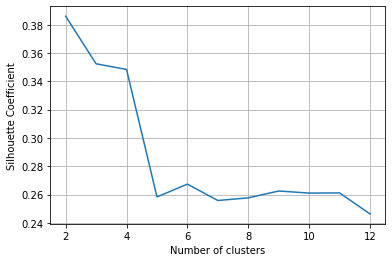

In [64]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [65]:
scores

[0.3859728598247321,
 0.3523767483414092,
 0.3483812036371998,
 0.2583460932108913,
 0.2673835398934422,
 0.2558105632112204,
 0.25767347210329117,
 0.2625151691517045,
 0.2610493303774738,
 0.26115018516011484,
 0.24633062699431854]

In [66]:
pd.Series.sort_index(data_num.cluster_4.value_counts()/1000)

0    5.787
1    1.112
2    0.683
3    1.368
Name: cluster_4, dtype: float64

In [67]:
data_num.cluster_3.value_counts()/sum(data_num.cluster_3.value_counts())

0    0.700223
2    0.170391
1    0.129385
Name: cluster_3, dtype: float64

In [68]:
pd.Series.sort_index(data_num.cluster_4.value_counts())

0    5787
1    1112
2     683
3    1368
Name: cluster_4, dtype: int64

In [69]:
#Profiling
size=pd.concat([pd.Series(data_num.cluster_3.size), pd.Series.sort_index(data_num.cluster_3.value_counts()), pd.Series.sort_index(data_num.cluster_4.value_counts()),
           pd.Series.sort_index(data_num.cluster_5.value_counts()), pd.Series.sort_index(data_num.cluster_6.value_counts()),
           pd.Series.sort_index(data_num.cluster_7.value_counts()), pd.Series.sort_index(data_num.cluster_8.value_counts())])

In [70]:
size

0    8950
0    6267
1    1158
2    1525
0    5787
1    1112
2     683
3    1368
0     939
1    2376
2     665
3    3805
4    1165
0    3445
1     392
2    1109
3    1273
4    2089
5     642
0    2938
1    1245
2     653
3    1287
4     379
5     552
6    1896
0     548
1    1897
2     267
3     692
4     643
5     901
6    2738
7    1264
dtype: int64

In [71]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data_num.cluster_3.size, columns=['Seg_Pct'])

In [72]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,6267.000000,1158.000000,1525.000000,5787.000000,1112.000000,683.000000,1368.000000,939.000000,2376.000000,...,552.000000,1896.000000,548.000000,1897.000000,267.000000,692.000000,643.000000,901.00000,2738.000000,1264.000000
Seg_Pct,1.0,0.700223,0.129385,0.170391,0.646592,0.124246,0.076313,0.152849,0.104916,0.265475,...,0.061676,0.211844,0.061229,0.211955,0.029832,0.077318,0.071844,0.10067,0.305922,0.141229


In [73]:
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,1.446508,0,0,3,0,0,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,3.826241,2,3,4,2,3,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,0.991682,0,0,3,3,1,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,0.000000,0,0,3,0,0,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2.771075,0,0,3,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,24.260000,0.000000,0.028494,6.660231,0,2,2,5,2,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,25.000000,0.000000,0.019183,0.359520,0,2,2,5,2,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,12.033333,0.000000,0.023399,0.986076,0,2,2,5,2,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.000000,3.046565,0.026915,0.942505,0,2,2,5,2,4


In [74]:
data_num.groupby('cluster_5').apply(np.mean).T

cluster_5,0,1,2,3,4
BALANCE,2301.843238,878.032143,805.967994,1176.922208,3888.905695
BALANCE_FREQUENCY,0.977971,0.916138,0.778341,0.822638,0.957984
PURCHASES,4351.983568,971.543481,386.416180,320.527235,435.861717
ONEOFF_PURCHASES,2952.305740,252.405871,221.975880,255.610631,265.644144
INSTALLMENTS_PURCHASES,1261.666484,716.861412,164.891429,65.052053,168.340764
CASH_ADVANCE,453.081484,173.443486,958.289682,517.699438,4233.337737
PURCHASES_FREQUENCY,0.924991,0.873451,0.429631,0.222214,0.269116
ONEOFF_PURCHASES_FREQUENCY,0.760540,0.134766,0.115375,0.145046,0.127915
PURCHASES_INSTALLMENTS_FREQUENCY,0.666887,0.817409,0.296461,0.077226,0.173691
CASH_ADVANCE_FREQUENCY,0.064546,0.032621,0.169892,0.097435,0.495807


In [75]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_num.apply(lambda x: x.mean()).T, data_num.groupby('cluster_3').apply(lambda x: x.mean()).T, data_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_5').apply(lambda x: x.mean()).T, data_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_7').apply(lambda x: x.mean()).T, data_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [76]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,948.300723,2179.624622,3492.040708,996.522262,2195.256657,798.013229,3683.717294,2301.843238,878.032143,...,4660.981465,817.458113,4660.159269,763.403289,3275.237072,2067.248176,829.124009,1143.124771,910.527087,2713.050118
BALANCE_FREQUENCY,0.878083,0.843980,0.977248,0.942932,0.852483,0.977673,0.780852,0.953973,0.977971,0.916138,...,0.965916,0.917668,0.965667,0.912870,0.985129,0.982333,0.773155,0.927873,0.780467,0.937557
PURCHASES,936.229237,517.473755,3924.184344,388.221757,533.919722,4010.778201,391.279810,410.985943,4351.983568,971.543481,...,702.255163,879.813739,672.915073,829.351202,7196.198427,3074.193179,368.974790,1410.865261,227.257882,203.968236
ONEOFF_PURCHASES,536.493774,228.470495,2597.868402,237.024969,234.937213,2655.754101,216.838082,249.077967,2952.305740,252.405871,...,435.184888,130.103697,414.117555,127.024750,5077.437708,1677.780766,212.356096,1246.920411,146.157027,124.065309
INSTALLMENTS_PURCHASES,384.498368,288.584824,1212.703524,149.763030,298.477526,1236.711889,174.880966,160.309671,1261.666484,716.861412,...,262.925073,743.782773,258.796132,700.635384,1768.431871,1337.754135,157.085257,164.315494,81.185015,79.983362
CASH_ADVANCE,935.920972,334.349308,432.288033,3790.515441,325.827627,429.521203,954.399069,3919.185733,453.081484,173.443486,...,5724.123564,160.729924,5713.825442,151.444444,616.263854,396.700847,1006.616413,217.865280,302.235876,2253.080708
PURCHASES_FREQUENCY,0.490351,0.467678,0.926870,0.252056,0.468078,0.928095,0.430578,0.258584,0.924991,0.873451,...,0.358006,0.895109,0.353320,0.887225,0.936398,0.956936,0.413427,0.724888,0.176605,0.156037
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.127343,0.719058,0.118865,0.131587,0.724630,0.114486,0.121726,0.760540,0.134766,...,0.182298,0.067096,0.179219,0.065930,0.817336,0.629419,0.109565,0.660067,0.068304,0.065461
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.355010,0.684291,0.160298,0.356777,0.687986,0.298808,0.166609,0.666887,0.817409,...,0.243642,0.859659,0.240858,0.850031,0.699682,0.846962,0.284119,0.180226,0.102739,0.093300
CASH_ADVANCE_FREQUENCY,0.134017,0.066028,0.062349,0.467835,0.063760,0.062942,0.171003,0.470529,0.064546,0.032621,...,0.588660,0.030289,0.589721,0.028252,0.070537,0.066337,0.175964,0.038288,0.062577,0.347288


In [77]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [78]:
Profling_output_final.head()

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,6267.000000,1158.000000,1525.000000,5787.000000,1112.000000,683.000000,1368.000000,939.000000,2376.000000,...,552.000000,1896.000000,548.000000,1897.000000,267.000000,692.000000,643.000000,901.000000,2738.000000,1264.000000
Seg_Pct,1.000000,0.700223,0.129385,0.170391,0.646592,0.124246,0.076313,0.152849,0.104916,0.265475,...,0.061676,0.211844,0.061229,0.211955,0.029832,0.077318,0.071844,0.100670,0.305922,0.141229
BALANCE,1541.046707,948.300723,2179.624622,3492.040708,996.522262,2195.256657,798.013229,3683.717294,2301.843238,878.032143,...,4660.981465,817.458113,4660.159269,763.403289,3275.237072,2067.248176,829.124009,1143.124771,910.527087,2713.050118
BALANCE_FREQUENCY,0.878083,0.843980,0.977248,0.942932,0.852483,0.977673,0.780852,0.953973,0.977971,0.916138,...,0.965916,0.917668,0.965667,0.912870,0.985129,0.982333,0.773155,0.927873,0.780467,0.937557
PURCHASES,936.229237,517.473755,3924.184344,388.221757,533.919722,4010.778201,391.279810,410.985943,4351.983568,971.543481,...,702.255163,879.813739,672.915073,829.351202,7196.198427,3074.193179,368.974790,1410.865261,227.257882,203.968236


In [79]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [80]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,6267.000000,1158.000000,1525.000000,5787.000000,1112.000000,683.000000,1368.000000,939.000000,2376.000000,...,552.000000,1896.000000,548.000000,1897.000000,267.000000,692.000000,643.000000,901.000000,2738.000000,1264.000000
Seg_Pct,1.000000,0.700223,0.129385,0.170391,0.646592,0.124246,0.076313,0.152849,0.104916,0.265475,...,0.061676,0.211844,0.061229,0.211955,0.029832,0.077318,0.071844,0.100670,0.305922,0.141229
BALANCE,1541.046707,948.300723,2179.624622,3492.040708,996.522262,2195.256657,798.013229,3683.717294,2301.843238,878.032143,...,4660.981465,817.458113,4660.159269,763.403289,3275.237072,2067.248176,829.124009,1143.124771,910.527087,2713.050118
BALANCE_FREQUENCY,0.878083,0.843980,0.977248,0.942932,0.852483,0.977673,0.780852,0.953973,0.977971,0.916138,...,0.965916,0.917668,0.965667,0.912870,0.985129,0.982333,0.773155,0.927873,0.780467,0.937557
PURCHASES,936.229237,517.473755,3924.184344,388.221757,533.919722,4010.778201,391.279810,410.985943,4351.983568,971.543481,...,702.255163,879.813739,672.915073,829.351202,7196.198427,3074.193179,368.974790,1410.865261,227.257882,203.968236
ONEOFF_PURCHASES,536.493774,228.470495,2597.868402,237.024969,234.937213,2655.754101,216.838082,249.077967,2952.305740,252.405871,...,435.184888,130.103697,414.117555,127.024750,5077.437708,1677.780766,212.356096,1246.920411,146.157027,124.065309
INSTALLMENTS_PURCHASES,384.498368,288.584824,1212.703524,149.763030,298.477526,1236.711889,174.880966,160.309671,1261.666484,716.861412,...,262.925073,743.782773,258.796132,700.635384,1768.431871,1337.754135,157.085257,164.315494,81.185015,79.983362
CASH_ADVANCE,935.920972,334.349308,432.288033,3790.515441,325.827627,429.521203,954.399069,3919.185733,453.081484,173.443486,...,5724.123564,160.729924,5713.825442,151.444444,616.263854,396.700847,1006.616413,217.865280,302.235876,2253.080708
PURCHASES_FREQUENCY,0.490351,0.467678,0.926870,0.252056,0.468078,0.928095,0.430578,0.258584,0.924991,0.873451,...,0.358006,0.895109,0.353320,0.887225,0.936398,0.956936,0.413427,0.724888,0.176605,0.156037
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.127343,0.719058,0.118865,0.131587,0.724630,0.114486,0.121726,0.760540,0.134766,...,0.182298,0.067096,0.179219,0.065930,0.817336,0.629419,0.109565,0.660067,0.068304,0.065461


In [81]:
Profling_output_final.to_csv('Profling_output_final.csv')

In [82]:
import pickle

# predicting the segments

In [86]:
new_data = pd.DataFrame()
for i in datafile.columns:
    if (datafile[i].dtype == 'float64')|(datafile[i].dtype == 'int64'):
        new_data[i] = datafile[i]

In [87]:
new_data = new_data.apply(missing_num)
new_data = new_data.apply(outlier_capping)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [88]:
new_data['Monthly_average_purchase'] = data_num.PURCHASES / 12

new_data['Monthly_cash_advance'] = data_num.CASH_ADVANCE / 12

new_data['Limit_usage'] = data_num.BALANCE / data_num.CREDIT_LIMIT

new_data['Pay_Min_Pay'] = data_num.PAYMENTS / data_num.MINIMUM_PAYMENTS

In [89]:
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6.0,1000.0,325.594462,48.886365,0.500000,6,24.260000,0.000000,0.028494,6.660231
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6.0,1000.0,275.861322,864.206542,0.000000,6,25.000000,0.000000,0.019183,0.359520
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,5.0,1000.0,81.270775,82.418369,0.250000,6,12.033333,0.000000,0.023399,0.986076
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.0,500.0,52.549959,55.755628,0.250000,6,0.000000,3.046565,0.026915,0.942505


In [90]:
std_model.transform(new_data)

array([[-0.76285553, -0.25596817, -0.55132729, ..., -0.527079  ,
        -0.9796858 , -0.26838288],
       [ 0.84486711,  0.13250091, -0.61388057, ...,  3.10136973,
         0.20556414, -0.11151178],
       [ 0.48518086,  0.52096999, -0.10691708, ..., -0.527079  ,
        -0.14952846, -0.2983649 ],
       ...,
       [-0.7717557 , -0.19122546, -0.51919825, ..., -0.527079  ,
        -1.02948081, -0.29873442],
       [-0.77681097, -0.19122546, -0.61388057, ..., -0.50649033,
        -1.01947617, -0.3016066 ],
       [-0.59412458, -0.90341664,  0.10295769, ..., -0.45553437,
        -0.2123949 , -0.31657468]])

In [91]:
new_data_scaled1 = pd.DataFrame(std_model.transform(new_data), columns = new_data.columns)

In [92]:
input_segmentation = new_data_scaled1[selected_vars]

In [93]:
km_4.predict(input_segmentation)

array([0, 3, 0, ..., 2, 2, 2])

In [94]:
new_data['segment'] = km_4.predict(input_segmentation)

In [95]:
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,Limit_usage,Pay_Min_Pay,segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,0.222223,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,325.594462,48.886365,0.500000,6,24.260000,0.000000,0.028494,6.660231,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,275.861322,864.206542,0.000000,6,25.000000,0.000000,0.019183,0.359520,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,1000.0,81.270775,82.418369,0.250000,6,12.033333,0.000000,0.023399,0.986076,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,500.0,52.549959,55.755628,0.250000,6,0.000000,3.046565,0.026915,0.942505,2


In [96]:
new_data.to_csv("DATA_with_segement.csv")